Unsupervised learning: advanced clustering.

In [1]:
# Se requiere python ≥3.5
import sys
import sklearn
import numpy as np
import os

# Para hacer que la salida de este portátil sea estable a lo largo de las ejecuciones
np.random.seed(42)

In [2]:
# Para trazar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# Dónde guardar las figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Unsupervised_learning_advanced_clustering"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Figures", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Agrupación - Introducción: clasificación frente a agrupamiento

In [4]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


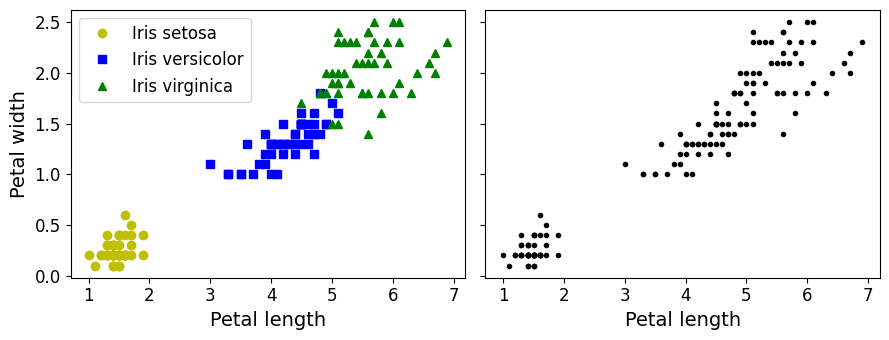

In [5]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
save_fig("classification_vs_clustering_plot")
plt.show()

Un modelo de mezcla gaussiana en realidad puede separar estos grupos bastante
bien (usando las 4 características: largo y ancho de los pétalos, y largo y ancho de los sépalos).

In [6]:
from sklearn.mixture import GaussianMixture
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)


In [7]:
#Mapeemos cada grupo a una clase. En lugar de codificar el mapeo (como se hace en el libro, para simplificar), elegiremos la clase más común para cada grupo (usando la función scipy.stats.mode() ):
from scipy import stats
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    if mode.size > 0: 
        mapping[mode] = class_id
    else:
        mapping[class_id]
mapping

{1: 0, 2: 1, 0: 2}

In [8]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

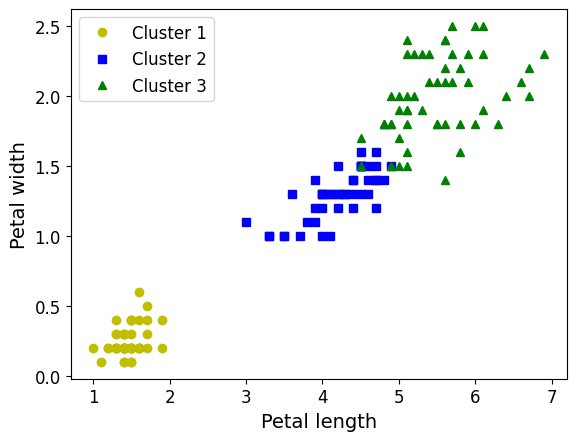

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [10]:
np.sum(y_pred==y)

145

In [11]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

K-MEANS. Start generating some blobs.

In [12]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
[[ 0.2, 2.3],
[-1.5 , 2.3],
[-2.8, 1.8],
[-2.8, 2.8],
[-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

Saving figure blobs_plot


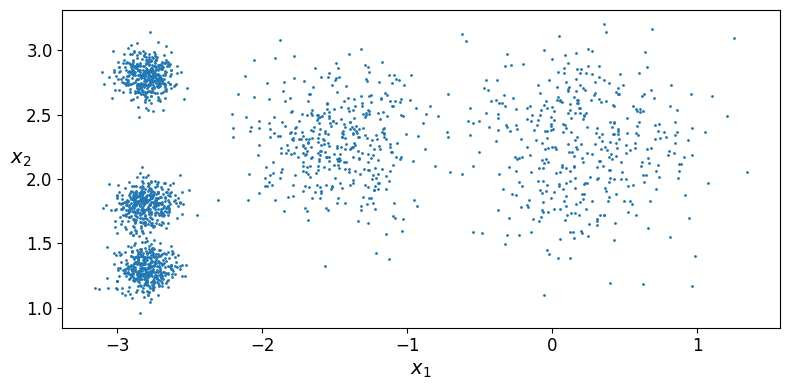

In [13]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

Adjust and predict

In [14]:
#Entrenemos un agrupador de K-Means en este conjunto de datos. Intentará encontrar el centro de cada blob y
#asignar cada instancia al blob más cercano:

from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

#Cada instancia se asignó a uno de estos 5 clusters

y_pred

c:\Users\Cristian Valiante\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 4, ..., 3, 1, 0])

In [15]:
y_pred is kmeans.labels_

True

In [16]:
#Y se estimaron los siguientes 5 centroides (es decir, centros de conglomerados):
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

Tenga en cuenta que la instancia de KMeans conserva las etiquetas de las instancias en las que se entrenó.
Algo confuso, en este contexto, la etiqueta de una instancia es el índice del clúster al que se asigna esa
instancia:

In [17]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0])

In [18]:
#Por supuesto, podemos predecir las etiquetas de nuevas instancias:

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3])

In [21]:
#LÍMITES DE DECISIÓN
#Tracemos los límites de decisión del modelo. Esto nos da un diagrama de Voronoi :

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='o', s=35, linewidths=8,
        color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=2, linewidths=12,
        color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


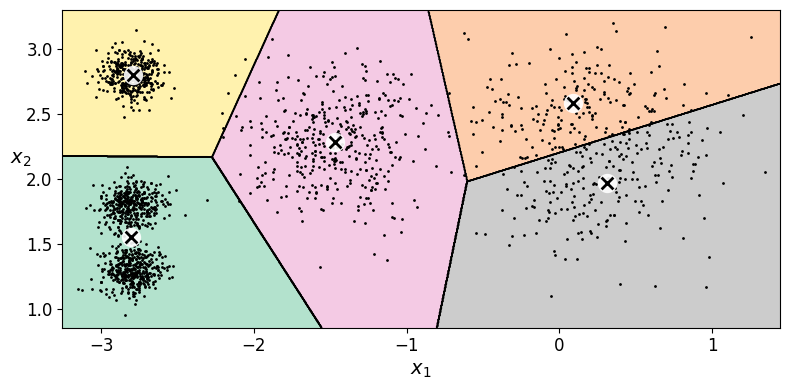

In [22]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()